In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='whitegrid')

# Importing Data

Data was scraped from the Amazon website for Versa Lite

In [5]:
df = pd.read_csv('versa_lite.csv', parse_dates =['date'])

In [6]:
df.head()

,web-scraper-order,web-scraper-start-url,review_link,review_link-href,name,date,stars,stars-href,verified,product,review
0,1564423471-1668,https://www.amazon.com/Fitbit-Smartwatch-Charc...,Love it!!,https://www.amazon.com/gp/customer-reviews/R1S...,Suzanne Malenfant,2018-06-23,5.0 out of 5 stars,https://www.amazon.com/gp/customer-reviews/R1S...,Verified Purchase,Color: BlackEdition: Versa Smart Watch,Great Fitbit. Love the swimproof feature. Scre...
1,1564426373-2335,https://www.amazon.com/Fitbit-Smartwatch-Charc...,I can track my swimming!,https://www.amazon.com/gp/customer-reviews/R7L...,Kim Rodriguez,2018-07-08,5.0 out of 5 stars,https://www.amazon.com/gp/customer-reviews/R7L...,Verified Purchase,Color: BlackEdition: Versa Smart Watch,I love that I can swim with it and that it tra...
2,1564417725-362,https://www.amazon.com/Fitbit-Smartwatch-Charc...,Five Stars,https://www.amazon.com/gp/customer-reviews/R7O...,Maria Plain,2018-05-21,5.0 out of 5 stars,https://www.amazon.com/gp/customer-reviews/R7O...,NaN,Color: BlackEdition: Versa Smart Watch,Not sure I can wear it in the pool
3,1564437074-4782,https://www.amazon.com/Fitbit-Smartwatch-Charc...,Heartrate tracking is great-Sleep tracking & c...,https://www.amazon.com/gp/customer-reviews/R1S...,Gwendolyn A. Kelts,2019-05-15,2.0 out of 5 stars,https://www.amazon.com/gp/customer-reviews/R1S...,Verified Purchase,Color: Periwinkle/Rose GoldEdition: Versa Smar...,I bought this Fitbit several months ago.\n\nTh...
4,1564423532-1685,https://www.amazon.com/Fitbit-Smartwatch-Charc...,Easy to use,https://www.amazon.com/gp/customer-reviews/R1F...,Jessie,2018-06-20,5.0 out of 5 stars,https://www.amazon.com/gp/customer-reviews/R1F...,Verified Purchase,Color: BlackEdition: Versa Smart Watch,So far so good! Charged it Sunday and it is no...


In [7]:
df = df.drop(columns=['web-scraper-order','web-scraper-start-url'])

In [8]:
df['stars'] = df.stars.apply(lambda x: x.split(' ')[0])

In [9]:
df.head()

,review_link,review_link-href,name,date,stars,stars-href,verified,product,review
0,Love it!!,https://www.amazon.com/gp/customer-reviews/R1S...,Suzanne Malenfant,2018-06-23,5.0,https://www.amazon.com/gp/customer-reviews/R1S...,Verified Purchase,Color: BlackEdition: Versa Smart Watch,Great Fitbit. Love the swimproof feature. Scre...
1,I can track my swimming!,https://www.amazon.com/gp/customer-reviews/R7L...,Kim Rodriguez,2018-07-08,5.0,https://www.amazon.com/gp/customer-reviews/R7L...,Verified Purchase,Color: BlackEdition: Versa Smart Watch,I love that I can swim with it and that it tra...
2,Five Stars,https://www.amazon.com/gp/customer-reviews/R7O...,Maria Plain,2018-05-21,5.0,https://www.amazon.com/gp/customer-reviews/R7O...,NaN,Color: BlackEdition: Versa Smart Watch,Not sure I can wear it in the pool
3,Heartrate tracking is great-Sleep tracking & c...,https://www.amazon.com/gp/customer-reviews/R1S...,Gwendolyn A. Kelts,2019-05-15,2.0,https://www.amazon.com/gp/customer-reviews/R1S...,Verified Purchase,Color: Periwinkle/Rose GoldEdition: Versa Smar...,I bought this Fitbit several months ago.\n\nTh...
4,Easy to use,https://www.amazon.com/gp/customer-reviews/R1F...,Jessie,2018-06-20,5.0,https://www.amazon.com/gp/customer-reviews/R1F...,Verified Purchase,Color: BlackEdition: Versa Smart Watch,So far so good! Charged it Sunday and it is no...


In [10]:
df['review'] = df.review.fillna('')

In [11]:
df['length'] = df.review.apply(lambda x: len(x))

In [12]:
df['year'] = df.date.apply(lambda x: x.year)

In [13]:
df['stars'] = pd.to_numeric(df.stars)

In [14]:
df.head()

,review_link,review_link-href,name,date,stars,stars-href,verified,product,review,length,year
0,Love it!!,https://www.amazon.com/gp/customer-reviews/R1S...,Suzanne Malenfant,2018-06-23,5.0,https://www.amazon.com/gp/customer-reviews/R1S...,Verified Purchase,Color: BlackEdition: Versa Smart Watch,Great Fitbit. Love the swimproof feature. Scre...,116,2018
1,I can track my swimming!,https://www.amazon.com/gp/customer-reviews/R7L...,Kim Rodriguez,2018-07-08,5.0,https://www.amazon.com/gp/customer-reviews/R7L...,Verified Purchase,Color: BlackEdition: Versa Smart Watch,I love that I can swim with it and that it tra...,58,2018
2,Five Stars,https://www.amazon.com/gp/customer-reviews/R7O...,Maria Plain,2018-05-21,5.0,https://www.amazon.com/gp/customer-reviews/R7O...,NaN,Color: BlackEdition: Versa Smart Watch,Not sure I can wear it in the pool,34,2018
3,Heartrate tracking is great-Sleep tracking & c...,https://www.amazon.com/gp/customer-reviews/R1S...,Gwendolyn A. Kelts,2019-05-15,2.0,https://www.amazon.com/gp/customer-reviews/R1S...,Verified Purchase,Color: Periwinkle/Rose GoldEdition: Versa Smar...,I bought this Fitbit several months ago.\n\nTh...,2343,2019
4,Easy to use,https://www.amazon.com/gp/customer-reviews/R1F...,Jessie,2018-06-20,5.0,https://www.amazon.com/gp/customer-reviews/R1F...,Verified Purchase,Color: BlackEdition: Versa Smart Watch,So far so good! Charged it Sunday and it is no...,105,2018


(-20, 2000)

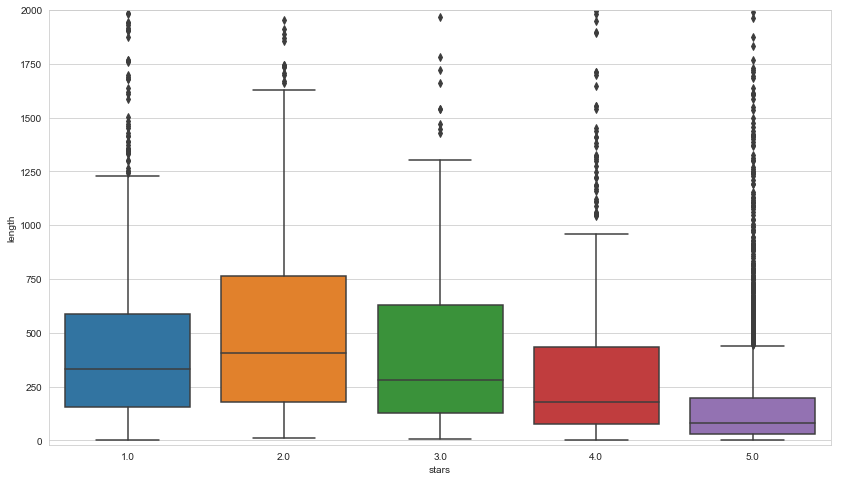

In [15]:
fig, ax = plt.subplots(figsize = (14,8))
sns.boxplot(df.stars, df.length)
plt.ylim(-20, 2000)

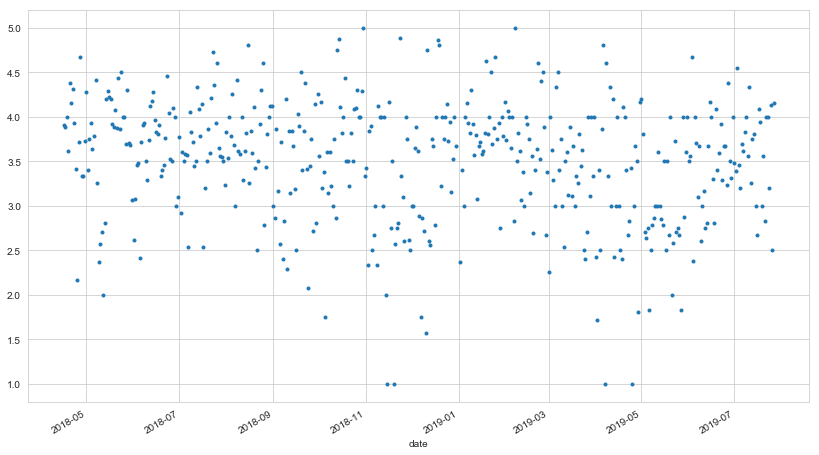

In [16]:
fig, ax = plt.subplots(figsize = (14,8))
df.groupby(['date'])['stars'].mean().plot(marker='.',linestyle='none')

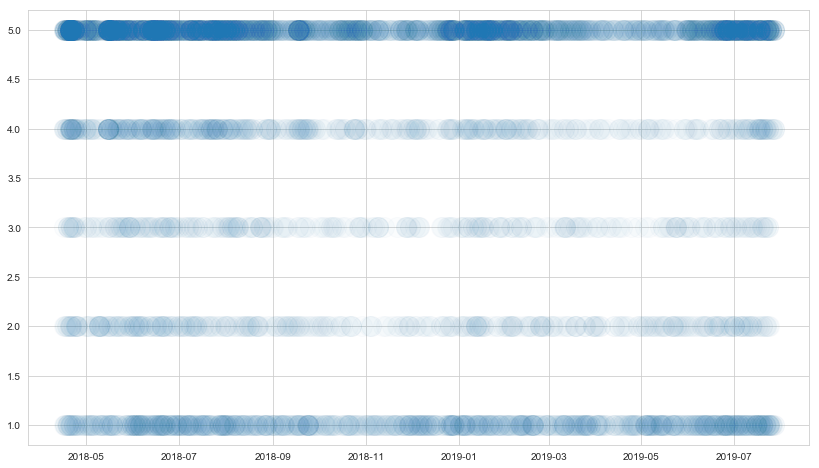

In [17]:
fig, ax = plt.subplots(figsize = (14,8))
plt.plot(df.date, df.stars, alpha=0.02, marker='.', linestyle='none', markersize=40)

In [18]:
df.shape

(4998, 11)

Text(0.5, 1.0, 'Amazon Reviews for Fitbit Versa Lite')

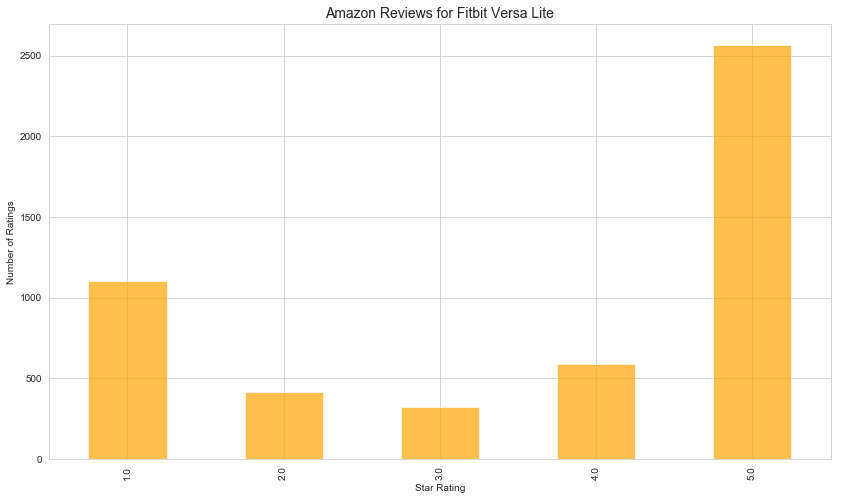

In [19]:
fig, ax = plt.subplots(figsize = (14,8))
df.groupby('stars').size().plot(kind='bar', color='orange', alpha=0.7)
plt.xlabel('Star Rating')
plt.ylabel('Number of Ratings')
plt.title('Amazon Reviews for Fitbit Versa Lite', fontsize=14)

# NLP

In [18]:
import gensim
import spacy
from nltk import FreqDist
from gensim.models import LdaModel, phrases
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim

import os, re, operator, warnings
warnings.filterwarnings('ignore')  # Let's not pay heed to them right now

# SpaCy

In [19]:
#$ python -m spacy download en_core_web_md (run in shell if not installed)
nlp = spacy.load('en_core_web_lg')

In [20]:
text = df.review[12]
print(text)

Perfect for tracking steps, catching text messages and basic time functions. Love it!


In [21]:
# Process the text
doc = nlp(text)

In [24]:
for token in doc:
    if token.lemma_ in terms:
        print("{0}/{1} <--{2}-- {3}/{4}".format(
        token.text, token.tag_, token.dep_, token.head.text, token.head.tag_))

In [25]:
for sentence in doc.sents:
    chunk = []
    for token in sentence:     
        if token.lemma_ in terms:
            print(sentence)
            print('---')
            print("{0}/{1} <--{2}-- {3}/{4}".format(
                  token.text, token.tag_, token.dep_, token.head.text, token.head.tag_))
            print('---')           
            for child in sentence.root.children:
                chunk.append(child.text)
                print(f'child: {child}')

In [26]:
from spacy import displacy

# In[2]:
doc = nlp(u"i am very disapointed especially about the heart rate tracker")
displacy.render(doc, style="dep", jupyter=True, options={'distance':90})

In [27]:
for sentence in doc.sents:
    print(sentence)
    print('--------------------')

i am very disapointed especially about the heart rate tracker
--------------------


In [28]:
'''#stemming
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='english')'''

"#stemming\nfrom nltk.stem.snowball import SnowballStemmer\nstemmer = SnowballStemmer(language='english')"

In [29]:
#A very slow way of extracting search terms
'''for term in terms:    
    for i in doc:
        sims = nlp(stemmer.stem(term))[0].similarity(nlp(stemmer.stem(str(i))))
        if sims > 0.7:
            print(sims, i)'''

'for term in terms:    \n    for i in doc:\n        sims = nlp(stemmer.stem(term))[0].similarity(nlp(stemmer.stem(str(i))))\n        if sims > 0.7:\n            print(sims, i)'

## Phrase Matcher

In [30]:
from spacy.matcher import PhraseMatcher

In [31]:
terms = [u"heart rate", u"gps", u"sync", u"syncing", u"design",
         u"charging", u"charger", u"battery", u"quality", 
         u"screen", u"service", u"sleep", u"alarm", u"reminder"]

In [32]:
def phrase_matcher(review): 
    matched_list = []
    matcher = PhraseMatcher(nlp.vocab)
    # Only run nlp.make_doc to speed things up
    patterns = [nlp.make_doc(text) for text in terms]
    matcher.add("TerminologyList", None, *patterns)
    matches = matcher(review)
    for match_id, start, end in matches:
        span = review[start:end]
        matched_list.append(span.text)
    return list(set(matched_list))

# Sentiment Analysis - TextBlob, Afinn, NLTK+Vader

In [33]:
#TEXTBLOB
from textblob import TextBlob
#AFINN
from afinn import Afinn
af = Afinn()
#NLTK
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dmitriykats/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Phrase count in new DataFrame

In [34]:
#create a dataframe with our phrases as columns, to keep count of sentiment
phrase_df = pd.DataFrame(columns=terms)

In [35]:
def get_sentiment(input_string): 
    '''
    Takes a string (sentence), and returns an averaged, three-model 
    sentiment score, from -1 to 1. Where -1 is negative sentiment, 0 is neutral,
    and +1 is positive sentiment. 
    '''
    #calculate sentiment score with TextBlob, Afinn, NLTK+Vader
    txt_blob = TextBlob(input_string.text).sentiment[0]
    a_fin = af.score(input_string.text)
    nltk_vader = sid.polarity_scores(input_string.text).get('compound')
    
    #TextBlob
    if txt_blob > 0.1:
        blob = 1
    elif txt_blob == 0 and txt_blob <= 0.1:
        blob = 0
    else: blob = -1

    #afinn
    if a_fin > 1:
         fin = 1
    elif a_fin == 0 and a_fin <= 1:
        fin = 0
    else: fin = -1

    #NLTK-Vader
    if nltk_vader > 0.1:
        vader = 1
    elif nltk_vader == 0 and nltk_vader <= 0.1:
        vader = 0
    else: vader = -1
   
    #Averaged return
    avg_score = (blob + fin + vader) / 3
    return avg_score      

In [36]:
#need SpaCy lg dictionary and TextBlob

def review_sent(review):
    '''
    for a given review, returns dictionary of matched phrases : sentiment
    '''
    sent_dict = {}
    count_df = pd.DataFrame(columns=['phrase','sentiment'])
    doc = nlp(review)
    
    for sentence in doc.sents:
        matched_phrases = phrase_matcher(nlp(str(sentence)))
        phrases = ', '.join(matched_phrases)
        
        #Get Sentiment from models
        sentence_sentiment = get_sentiment(sentence)

        #check if more than one phrase found by phrase matcher
        if len(matched_phrases) > 1:
            #add each phrase of the given sentence to the dataframe
            for item in matched_phrases:
                count_df.loc[-1] = [item, sentence_sentiment]   
                count_df.index = count_df.index + 1
                count_df = count_df.sort_index()
        else:    
            count_df.loc[-1] = [phrases, sentence_sentiment]   
            count_df.index = count_df.index + 1
            count_df = count_df.sort_index()
          
    grouped_df = count_df.groupby('phrase').sum()
    grouped_dict = grouped_df.to_dict()
    sentimen_dict = grouped_dict['sentiment']
    return sentimen_dict

In [37]:
df['sentiment'] = df.review.apply(lambda x: review_sent(x))

In [38]:
df_concat = pd.concat([df, phrase_df], axis=1)

In [39]:
for i in phrase_df.columns:
    df_concat[i] = df_concat.apply(lambda x: x.sentiment.get(i), axis=1)

In [40]:
new_df = df_concat.iloc[:, 12:]

In [41]:
df_concat.groupby('stars').sum().iloc[:, 2:]

,heart rate,gps,sync,syncing,design,charging,charger,battery,quality,screen,service,sleep,alarm,reminder
stars,,,,,,,,,,,,,,
1.0,-16.333333,0.666667,-28.666667,-18.333333,-5.666667,-13.666667,-8.333333,-40.333333,-2.000000,-64.666667,-37.666667,-14.000000,-3.000000,0.000000
2.0,-4.666667,-1.333333,-10.000000,-14.666667,-2.333333,-7.666667,-0.333333,-12.333333,8.333333,-10.000000,0.333333,8.000000,-4.000000,-1.000000
3.0,11.333333,2.000000,7.000000,-5.333333,3.333333,0.666667,-1.000000,2.666667,7.000000,-1.333333,5.666667,7.333333,-1.333333,0.666667
4.0,19.333333,0.333333,-3.666667,-6.333333,9.666667,1.000000,-2.000000,26.666667,9.000000,25.000000,7.000000,24.666667,-4.333333,-0.666667
5.0,56.666667,3.000000,8.333333,-1.333333,31.666667,6.666667,7.000000,141.000000,31.666667,76.333333,6.333333,124.333333,0.666667,2.666667


In [42]:
new_df.head()

,heart rate,gps,sync,syncing,design,charging,charger,battery,quality,screen,service,sleep,alarm,reminder
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.666667,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


<module 'matplotlib.pyplot' from '/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

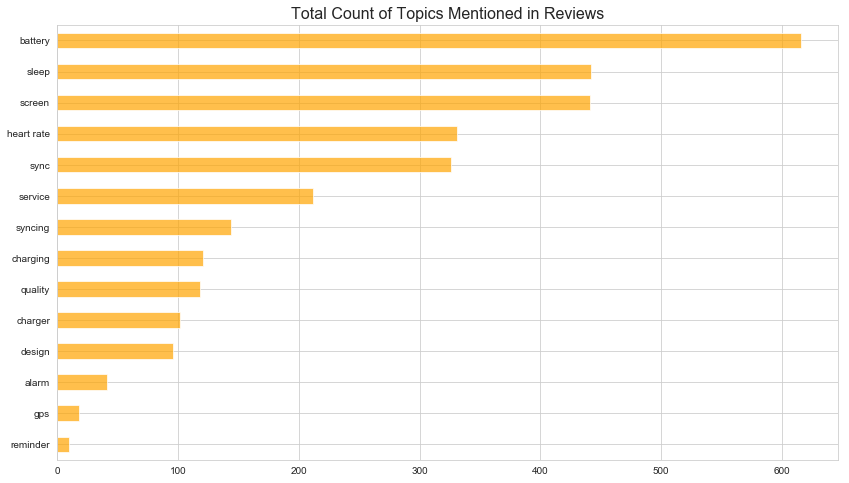

In [43]:
fig, ax = plt.subplots(figsize = (14,8))
new_df.count().sort_values().plot(kind='barh', color='orange', alpha=0.7)
plt.title('Total Count of Topics Mentioned in Reviews', fontsize=16)
plt

Text(0.5, 0, 'Count of Negative and Positive Comments')

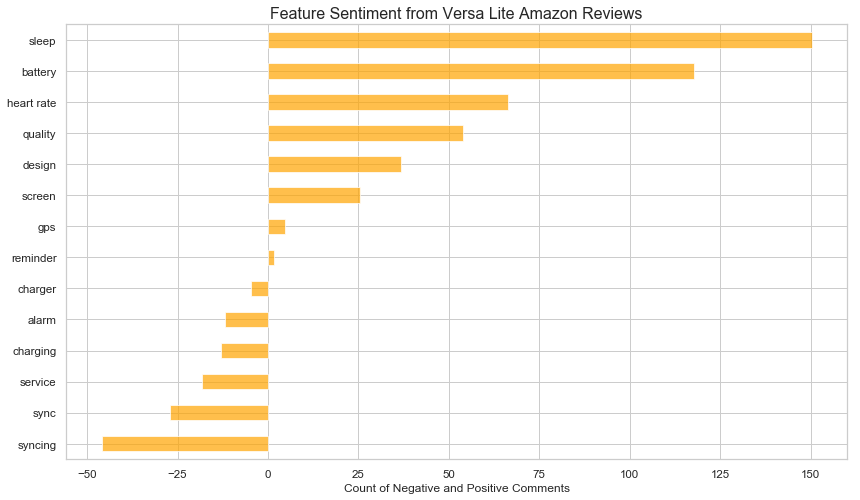

In [48]:
fig, ax = plt.subplots(figsize = (14,8))
new_df.sum().sort_values().plot(kind='barh', color='orange', alpha=0.7)
plt.title('Feature Sentiment from Versa Lite Amazon Reviews', fontsize=16)
plt.xlabel('Count of Negative and Positive Comments', fontsize=12)

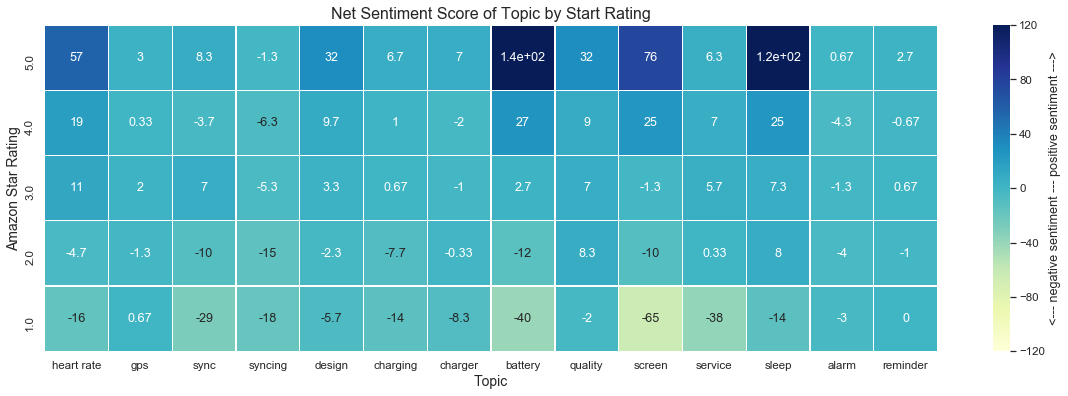

In [45]:
sns.set(font_scale=1.05)
fig, ax = plt.subplots(figsize = (20,6))
sns.heatmap(df_concat.groupby('stars').sum().iloc[:, 2:], vmin=-120, vmax=120,
            annot=True, linewidths=0.3, cmap='YlGnBu', 
            cbar_kws={'label': '<--- negative sentiment --- positive sentiment --->'})
ax.invert_yaxis()
plt.title('Net Sentiment Score of Topic by Start Rating', fontsize=16)
plt.xlabel('Topic', fontsize=14)
plt.ylabel('Amazon Star Rating', fontsize=14)
fig.savefig('Net_Sentiment_Scores.png')

## Phrase count in new DataFrame (TextBlob only)

In [ ]:
#create a dataframe with our phrases as columns, to keep count of sentiment
phrase_df = pd.DataFrame(columns=terms)

In [ ]:
#need SpaCy lg dictionary and TextBlob

def review_sent(review):
    '''
    for a given review, returns dictionary of matched phrases : sentiment
    '''
    sent_dict = {}
    count_df = pd.DataFrame(columns=['phrase','sentiment'])
    #create textblob object
    rev = TextBlob(review)
    
    for sentence in rev.sentences:
        matched_phrases = phrase_matcher(nlp(str(sentence)))
        phrases = ', '.join(matched_phrases)
    
        if sentence.sentiment[0] > 0.1:
            sentence_sentiment = 1
        elif sentence.sentiment[0] == 0 and sentence.sentiment[0] <= 0.1:
            sentence_sentiment = 0
        else:
            sentence_sentiment = -1
        
        #check if more than one phrase found by phrase matcher
        if len(matched_phrases) > 1:
            #add each phrase of the given sentence to the dataframe
            for item in matched_phrases:
                count_df.loc[-1] = [item, sentence_sentiment]   
                count_df.index = count_df.index + 1
                count_df = count_df.sort_index()
        else:    
            count_df.loc[-1] = [phrases, sentence_sentiment]   
            count_df.index = count_df.index + 1
            count_df = count_df.sort_index()
          
    grouped_df = count_df.groupby('phrase').sum()
    grouped_dict = grouped_df.to_dict()
    sentimen_dict = grouped_dict['sentiment']
    return sentimen_dict

In [ ]:
df['sentiment'] = df.review.apply(lambda x: review_sent(x))

In [ ]:
df_concat = pd.concat([df, phrase_df], axis=1)

In [ ]:
for i in phrase_df.columns:
    df_concat[i] = df_concat.apply(lambda x: x.sentiment.get(i), axis=1)

In [ ]:
new_df = df_concat.iloc[:, 12:]

In [ ]:
new_df.head()

In [ ]:
fig, ax = plt.subplots(figsize = (14,8))
new_df.count().sort_values().plot(kind='barh', color='orange', alpha=0.7)


In [ ]:
fig, ax = plt.subplots(figsize = (14,8))
new_df.sum().sort_values().plot(kind='barh', color='orange', alpha=0.7)
plt.title('Feature Sentiment from Versa Lite Amazon Reviews', fontsize=16)
plt.xlabel('Count of Negative and Positive Comments', fontsize=12)

## Phrase count in new DataFrame (AFFIN only)

In [ ]:
from afinn import Afinn
af = Afinn()

In [ ]:
#need SpaCy lg dictionary and AFFIN

def review_sent(review):
    '''
    for a given review, returns dictionary of matched phrases : sentiment
    '''
    sent_dict = {}
    count_df = pd.DataFrame(columns=['phrase','sentiment'])
    #create textblob object
    rev = TextBlob(review)
    
    for sentence in rev.sentences:
        matched_phrases = phrase_matcher(nlp(str(sentence)))
        phrases = ', '.join(matched_phrases)
    
        if af.score(str(sentence)) > 1:
            sentence_sentiment = 1
        elif af.score(str(sentence)) == 0 and af.score(str(sentence)) <= 1:
            sentence_sentiment = 0
        else:
            sentence_sentiment = -1
        
        #check if more than one phrase found by phrase matcher
        if len(matched_phrases) > 1:
            #add each phrase of the given sentence to the dataframe
            for item in matched_phrases:
                count_df.loc[-1] = [item, sentence_sentiment]   
                count_df.index = count_df.index + 1
                count_df = count_df.sort_index()
        else:    
            count_df.loc[-1] = [phrases, sentence_sentiment]   
            count_df.index = count_df.index + 1
            count_df = count_df.sort_index()
          
    grouped_df = count_df.groupby('phrase').sum()
    grouped_dict = grouped_df.to_dict()
    sentimen_dict = grouped_dict['sentiment']
    return sentimen_dict

In [ ]:
df['sentiment'] = df.review.apply(lambda x: review_sent(x))

In [ ]:
df_concat = pd.concat([df, phrase_df], axis=1)

In [ ]:
for i in phrase_df.columns:
    df_concat[i] = df_concat.apply(lambda x: x.sentiment.get(i), axis=1)

In [ ]:
new_df_afinn = df_concat.iloc[:, 12:]

In [ ]:
new_df_afinn.head()

In [ ]:
fig, ax = plt.subplots(figsize = (14,8))
new_df_afinn.count().sort_values().plot(kind='barh', color='orange', alpha=0.7)

In [ ]:
fig, ax = plt.subplots(figsize = (14,8))
new_df_afinn.sum().sort_values().plot(kind='barh', color='orange', alpha=0.7)
plt.title('Feature Sentiment from Versa Lite Amazon Reviews', fontsize=16)
plt.xlabel('Count of Negative and Positive Comments', fontsize=12)

## Phrase count in new DataFrame (NLTK only)

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

In [ ]:
#need SpaCy lg dictionary 

def review_sent(review):
    '''
    for a given review, returns dictionary of matched phrases : sentiment
    '''
    sent_dict = {}
    count_df = pd.DataFrame(columns=['phrase','sentiment'])
    #create textblob object
    rev = TextBlob(review)
    
    for sentence in rev.sentences:
        matched_phrases = phrase_matcher(nlp(str(sentence)))
        phrases = ', '.join(matched_phrases)
    
        if sid.polarity_scores(str(sentence)).get('compound') > 0.1:
            sentence_sentiment = 1
        elif sid.polarity_scores(str(sentence)).get('compound') == 0 \
            and sid.polarity_scores(str(sentence)).get('compound') <= 0.1:
            sentence_sentiment = 0
        else:
            sentence_sentiment = -1
        
        #check if more than one phrase found by phrase matcher
        if len(matched_phrases) > 1:
            #add each phrase of the given sentence to the dataframe
            for item in matched_phrases:
                count_df.loc[-1] = [item, sentence_sentiment]   
                count_df.index = count_df.index + 1
                count_df = count_df.sort_index()
        else:    
            count_df.loc[-1] = [phrases, sentence_sentiment]   
            count_df.index = count_df.index + 1
            count_df = count_df.sort_index()
          
    grouped_df = count_df.groupby('phrase').sum()
    grouped_dict = grouped_df.to_dict()
    sentimen_dict = grouped_dict['sentiment']
    return sentimen_dict

In [ ]:
df['sentiment'] = df.review.apply(lambda x: review_sent(x))

In [ ]:
df_concat = pd.concat([df, phrase_df], axis=1)

In [ ]:
for i in phrase_df.columns:
    df_concat[i] = df_concat.apply(lambda x: x.sentiment.get(i), axis=1)

In [ ]:
new_df_nltk = df_concat.iloc[:, 12:]

In [ ]:
new_df_nltk.head()

In [ ]:
fig, ax = plt.subplots(figsize = (14,8))
new_df_nltk.count().sort_values().plot(kind='barh', color='orange', alpha=0.7)

In [ ]:
fig, ax = plt.subplots(figsize = (14,8))
new_df_nltk.sum().sort_values().plot(kind='barh', color='orange', alpha=0.7)
plt.title('Feature Sentiment from Versa Lite Amazon Reviews', fontsize=16)
plt.xlabel('Count of Negative and Positive Comments', fontsize=12)

# Sentiment Analyis with StanfordCoreNLP

In [93]:
from pycorenlp import StanfordCoreNLP
stan_nlp = StanfordCoreNLP('http://localhost:9000')

In [120]:
text = df.review[19]
print(text)

My wife likes the watches size and the features of the watch.  The sleep tracker breaks down sleep by stages which is great.


In [121]:
reviews = text
result = stan_nlp.annotate(text,
                   properties={
                       'annotators': 'sentiment, ner, pos',
                       'outputFormat': 'json',
                       'timeout': 5000,
                   })

In [122]:
for s in result["sentences"]:
    print("{}: '{}': {} (Sentiment Value) {} (Sentiment)".format(
        s["index"],
        " ".join([t["word"] for t in s["tokens"]]),
        s["sentimentValue"], s["sentiment"]))

0: 'My wife likes the watches size and the features of the watch .': 3 (Sentiment Value) Positive (Sentiment)
1: 'The sleep tracker breaks down sleep by stages which is great .': 1 (Sentiment Value) Negative (Sentiment)


In [123]:
sid.polarity_scores('The sleep tracker breaks down sleep by stages which is great .').get('compound')

0.6249

# Training Keras Deep Sentiment Model

In [ ]:
df['aspect_category'] = df.review.apply(lambda x: sorted(phrase_matcher(nlp(x))))

In [ ]:
df.head()

In [ ]:
df['aspect_cat_string'] = df.aspect_category.apply(lambda x: ', '.join(x))

In [ ]:
df['review'] = df.review.str.lower()

aspect_terms = []
for review in nlp.pipe(df.review):
    chunks = [(chunk.root.text) for chunk in review.noun_chunks if chunk.root.pos_ == 'NOUN']
    aspect_terms.append(' '.join(chunks))
df['aspect_terms'] = aspect_terms
df.head(5)

In [ ]:
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Activation

aspect_categories_model = Sequential()
aspect_categories_model.add(Dense(512, input_shape=(6000,), activation='relu'))
aspect_categories_model.add(Dense(205, activation='softmax'))
aspect_categories_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.preprocessing.text import Tokenizer

vocab_size = 6000 # We set a maximum size for the vocabulary
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df.review)
aspect_tokenized = pd.DataFrame(tokenizer.texts_to_matrix(df.aspect_terms))

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()
integer_category = label_encoder.fit_transform(df.aspect_cat_string)
dummy_category = to_categorical(integer_category)

In [ ]:
aspect_categories_model.fit(aspect_tokenized, dummy_category, epochs=5, verbose=1)

In [ ]:
new_review = text

chunks = [(chunk.root.text) for chunk in nlp(new_review).noun_chunks if chunk.root.pos_ == 'NOUN']
new_review_aspect_terms = ' '.join(chunks)
new_review_aspect_tokenized = tokenizer.texts_to_matrix([new_review_aspect_terms])

new_review_category = label_encoder.inverse_transform(aspect_categories_model.predict_classes(new_review_aspect_tokenized))
print(new_review_category)

In [ ]:
sentiment_terms = []
for review in nlp.pipe(df['review']):
        if review.is_parsed:
            sentiment_terms.append(' '.join([token.lemma_ for token in review if (not token.is_stop and not token.is_punct and (token.pos_ == "ADJ" or token.pos_ == "VERB"))]))
        else:
            sentiment_terms.append('')  
df['sentiment_terms'] = sentiment_terms
df.head()

In [ ]:
sentiment_model = Sequential()
sentiment_model.add(Dense(512, input_shape=(6000,), activation='relu'))
sentiment_model.add(Dense(3, activation='softmax'))
sentiment_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
sentiment_tokenized = pd.DataFrame(tokenizer.texts_to_matrix(df.sentiment_terms))

In [ ]:
def sentiment_return(rating):
    sentiment = 'positive'
    if rating == 3:
        sentiment = 'neutral'
    elif rating < 3:
        sentiment = 'negative'
    return sentiment

In [ ]:
df['sentiment'] = df.stars.apply(lambda x: sentiment_return(x))

In [ ]:
df.head()

In [ ]:
label_encoder_2 = LabelEncoder()
integer_sentiment = label_encoder_2.fit_transform(df.sentiment)
dummy_sentiment = to_categorical(integer_sentiment)

In [ ]:
sentiment_model.fit(sentiment_tokenized, dummy_sentiment, epochs=10, verbose=1)

In [ ]:
new_review = 'hate everything, and the watch does not work, sync is bad, sreen is dead'

chunks = [(chunk.root.text) for chunk in nlp(new_review).noun_chunks if chunk.root.pos_ == 'NOUN']
new_review_aspect_terms = ' '.join(chunks)
new_review_aspect_tokenized = tokenizer.texts_to_matrix([new_review_aspect_terms])

new_review_category = label_encoder_2.inverse_transform(sentiment_model.predict_classes(new_review_aspect_tokenized))
print(new_review_category)

In [ ]:
test_reviews = [
    "customer support they tell me to restart the watch. The problem has not been fixed, i'm returing it. Also, the watch does not sync!",
    "Sreen went blank after 3 days. Fitbit stopped syncing after 2 days",
    "Customer service just kept telling me to restart the watch, but could not fix my sync problem. I can't return it. awful support."
]

# Aspect preprocessing
test_reviews = [review.lower() for review in test_reviews]
test_aspect_terms = []
for review in nlp.pipe(test_reviews):
    chunks = [(chunk.root.text) for chunk in review.noun_chunks if chunk.root.pos_ == 'NOUN']
    test_aspect_terms.append(' '.join(chunks))
test_aspect_terms = pd.DataFrame(tokenizer.texts_to_matrix(test_aspect_terms))
                             
# Sentiment preprocessing
test_sentiment_terms = []
for review in nlp.pipe(test_reviews):
        if review.is_parsed:
            test_sentiment_terms.append(' '.join([token.lemma_ for token in review if (not token.is_stop and not token.is_punct and (token.pos_ == "ADJ" or token.pos_ == "VERB"))]))
        else:
            test_sentiment_terms.append('') 
test_sentiment_terms = pd.DataFrame(tokenizer.texts_to_matrix(test_sentiment_terms))

# Models output
test_aspect_categories = label_encoder.inverse_transform(aspect_categories_model.predict_classes(test_aspect_terms))
test_sentiment = label_encoder_2.inverse_transform(sentiment_model.predict_classes(test_sentiment_terms))
for i in range(3):
    print("Review " + str(i+1) + " is expressing a  " + test_sentiment[i] + " opinion about " + test_aspect_categories[i])